In [ ]:
!pip install panda

In [ ]:
%pip install matplotlib tensorflow h5py nltk

In [ ]:
%pip install seaborn tensorflow.keras.preprocessing.text tensorflow.keras.models tensorflow.keras.preprocessing.sequence tensorflow.keras.models tensorflow.keras.layers

: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import h5py
import re
# # import nltk
# from nltk.stem import PorterStemmer 
# from nltk.corpus import stopwords
# from sklearn.model_selection import train_test_split
# nltk.download('stopwords')
# ps=PorterStemmer()
# sw=stopwords.words('english')

In [ ]:
# from tensorflow.python.client import device_lib
# import tensorflow
# print(tensorflow.config.list_physical_devices('CPU'))

In [2]:
data = pd.read_csv("combined_data.csv")
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11616\3539815511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=data, palette='dark')


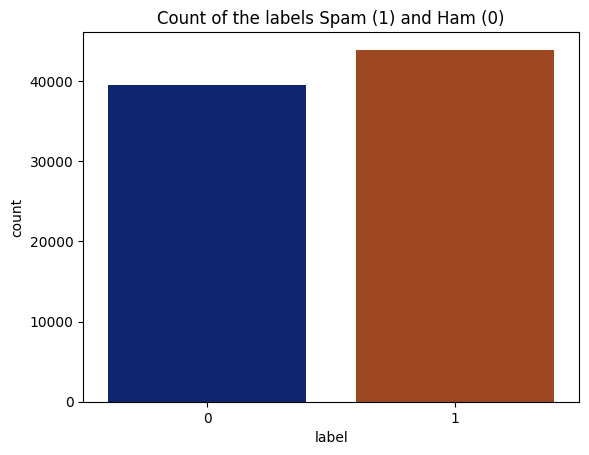

In [3]:
sns.countplot(x='label',data=data, palette='dark')
plt.title('Count of the labels Spam (1) and Ham (0)')
plt.show() 

# print(sns.palettes.SEABORN_PALETTES.keys())

In [4]:
def len_info(text):
    l=text.split()
    l=len(l)
    return l 

In [5]:
data['len_text']=data['text'].apply(len_info)
data.head()

,label,text,len_text
0,1,ounce feather bowl hummingbird opec moment ala...,20
1,1,wulvob get your medircations online qnb ikud v...,103
2,0,computer connection from cnn com wednesday es...,337
3,1,university degree obtain a prosperous future m...,76
4,0,thanks for all your answers guys i know i shou...,222


In [ ]:
# sns.boxplot(x='label', y='len_text', data=data, palette='dark')
# plt.title('Word Count Distribution by Label')
# plt.show()
#standardizing words with similar meanings.


In [6]:
def preprocessing(text):
    c_text=text.split()
    c_text=[ps.stem(word) for word in c_text if word not in sw ]
    c_text=' '.join(c_text)
    return c_text

In [7]:
data['clean_text']=data['text'].apply(preprocessing)
data.head()

,label,text,len_text,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,20,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,103,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,337,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,76,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,222,thank answer guy know check rsync manual would...


In [8]:
voc_size=1000
model=Sequential()
model.add(Embedding(voc_size,40))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [9]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(data['clean_text'].values)

NameError: name 'data' is not defined

In [10]:
sequences = tokenizer.texts_to_sequences(data['clean_text'].values)
maxlen = 100
x = pad_sequences(sequences,padding='post',maxlen=maxlen)
y=data['label']

NameError: name 'data' is not defined

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print('Train text shape: ',x_train.shape)
print('Train label shape: ',y_train.shape)

Train text shape:  (66758, 100)
Train label shape:  (66758,)


In [14]:
op=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 178s 83ms/step - accuracy: 0.7245 - loss: 0.5434 - val_accuracy: 0.8393 - val_loss: 0.4246
Epoch 2/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 176s 84ms/step - accuracy: 0.8506 - loss: 0.3716 - val_accuracy: 0.9005 - val_loss: 0.2434
Epoch 3/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 204s 85ms/step - accuracy: 0.9078 - loss: 0.2296 - val_accuracy: 0.9167 - val_loss: 0.2059
Epoch 4/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 180s 86ms/step - accuracy: 0.9246 - loss: 0.1947 - val_accuracy: 0.9218 - val_loss: 0.1940
Epoch 5/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 186s 89ms/step - accuracy: 0.9352 - loss: 0.1675 - val_accuracy: 0.9323 - val_loss: 0.1688
Epoch 6/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 186s 89ms/step - accuracy: 0.9429 - loss: 0.1484 - val_accuracy: 0.9382 - val_loss: 0.1510
Epoch 7/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 188s 90ms/step - accuracy: 0.9453 - loss: 0.1397 - val_accuracy: 0.9401 - val_loss: 0.1541
Epoch 8/10
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 190s 91ms/step - accuracy: 

In [ ]:
# plt.plot(op.history['accuracy'])
# plt.plot(op.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.show()

In [22]:
user=[''' 
    Hi Team,
Just a reminder about tomorrow's meeting at 10 AM in the conference room. Please bring the project updates. Let me know if you have any conflicts.
Regards,
John
''']
test_sequences = tokenizer.texts_to_sequences(user)
a=pad_sequences(test_sequences,padding='post',maxlen=300)

res=model.predict(a)

if res>0.5:
    print(f'spam:{res}')

else:
    print(f'not a spam:{res}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
spam:[[0.75320387]]


In [16]:
# saving data in h5 std format
model.save('lstm_model.h5')
print('Model Saved Successfully')
# also saving the state in jason formate

Model Saved Successfully


In [36]:
# saving data in json format
model_json = model.to_json() 
with open("network.json","w") as json_file:
    json_file.write(model_json) 
model.save_weights("network_weights.weights.h5")

In [38]:
loaded_model = load_model("network_weights.weights.h5")
loss,accuracy = loaded_model.evaluate()

ValueError: No model config found in the file at network_weights.weights.h5.

In [8]:
# # Eval your model

tokenizer = Tokenizer(num_words=100)
# tokenizer.fit_on_texts(data['clean_text'].values)

# sequences = tokenizer.texts_to_sequences(data['clean_text'].values)
# maxlen = 100
# x = pad_sequences(sequences,padding='post',maxlen=maxlen)
# y=data['label']

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# loss, acc = model.evaluate(x_test, y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [7]:


# Load the complete model
model = load_model('lstm_model.h5')

print("Model (architecture + weights) successfully loaded!")

Model (architecture + weights) successfully loaded!


In [19]:
user=[''' 
   Hi Team,

''']
test_sequences = tokenizer.texts_to_sequences(user)
a=pad_sequences(test_sequences,padding='post',maxlen=100)

res=model.predict(a)

if res>0.5:
    print(f'spam:{res}')

else:
    print(f'not a spam:{res}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
spam:[[0.7528324]]


In [ ]:


with h5py.File('lstm_model.h5', 'r') as f:
    print("Keys in the HDF5 file:", list(f.keys()))
    for key in f.keys():
        print(key, ":", list(f[key].keys()))

Keys in the HDF5 file: ['model_weights', 'optimizer_weights']
model_weights : ['dense_1', 'embedding_1', 'lstm_1', 'top_level_model_weights']
optimizer_weights : ['adam']


In [20]:
data = pd.read_csv("Phishing_validation_emails.csv")
data.head()

,Email Text,Email Type
0,"Dear Jordan, your subscription has been succes...",Safe Email
1,"Dear Casey, thank you for your purchase. Your ...",Safe Email
2,Congratulations! You've won a $3000 gift card....,Phishing Email
3,You have a new secure message from your bank. ...,Phishing Email
4,Your package delivery is pending. Please provi...,Phishing Email


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11616\1859135989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Email Type',data=data, palette='dark')


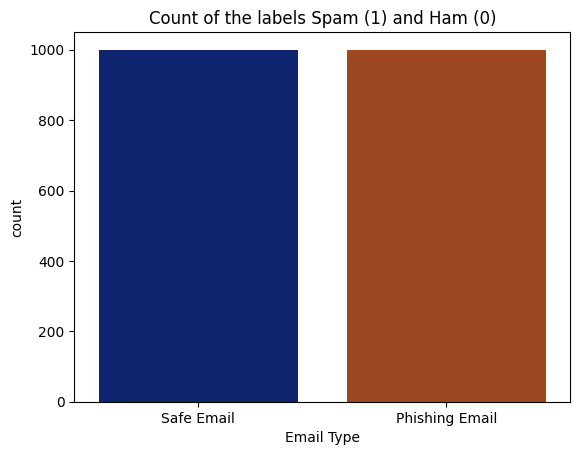

In [22]:
sns.countplot(x='Email Type',data=data, palette='dark')
plt.title('Count of the labels Spam (1) and Ham (0)')
plt.show() 

# print(sns.palettes.SEABORN_PALETTES.keys())

In [23]:
data['len_text']=data['Email Text'].apply(len_info)
data.head()

,Email Text,Email Type,len_text
0,"Dear Jordan, your subscription has been succes...",Safe Email,14
1,"Dear Casey, thank you for your purchase. Your ...",Safe Email,13
2,Congratulations! You've won a $3000 gift card....,Phishing Email,13
3,You have a new secure message from your bank. ...,Phishing Email,14
4,Your package delivery is pending. Please provi...,Phishing Email,13


In [27]:
data = pd.read_csv("Phishing_validation_emails.csv")
data.head()

,Email Text,Email Type
0,"Dear Jordan, your subscription has been succes...",Safe Email
1,"Dear Casey, thank you for your purchase. Your ...",Safe Email
2,Congratulations! You've won a $3000 gift card....,Phishing Email
3,You have a new secure message from your bank. ...,Phishing Email
4,Your package delivery is pending. Please provi...,Phishing Email


In [31]:
df = pd.DataFrame(data)
df['Email Type'] = df['Email Type'].map({'Safe Email':0,'Phishing Email':1})
print(df.head())

                                          Email Text  Email Type
0  Dear Jordan, your subscription has been succes...           0
1  Dear Casey, thank you for your purchase. Your ...           0
2  Congratulations! You've won a $3000 gift card....           1
3  You have a new secure message from your bank. ...           1
4  Your package delivery is pending. Please provi...           1


In [32]:
df['clean_text']=data['Email Text'].apply(preprocessing)
df.head()

,Email Text,Email Type,clean_text
0,"Dear Jordan, your subscription has been succes...",0,"dear jordan, subscript success renewed. thank ..."
1,"Dear Casey, thank you for your purchase. Your ...",0,"dear casey, thank purchase. your order ship soon."
2,Congratulations! You've won a $3000 gift card....,1,congratulations! you'v $3000 gift card. click ...
3,You have a new secure message from your bank. ...,1,you new secur messag bank. click read it.
4,Your package delivery is pending. Please provi...,1,your packag deliveri pending. pleas provid per...


In [50]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(df['clean_text'].values)

In [55]:
sequences = tokenizer.texts_to_sequences(df['clean_text'].values)
maxlen = 100
X = pad_sequences(sequences,padding='post',maxlen=maxlen)
Y=df['Email Type']

In [58]:
# Evaluate the model on the new dataset
loss, accuracy = loaded_model.evaluate(X, Y, batch_size=32)
print(f"Loss on new data: {loss}")
print(f"Accuracy on new data: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4496 - loss: 2.1627
Loss on new data: 2.115413188934326
Accuracy on new data: 0.4404999911785126
